Historic data indicates that the occurrence and intensity of cyclonic storms (Hurricanes, Typhoons and Tornados) increases with the increased earth temperature. For this assignment you will need to tell this story to a non-technical audience (eg: a high-school earth science class).

Notes:

Source historic data for a period of at least 25 years on a measure of the earth's temperature.

Source data on the occurrence and intensity of hurricanes, typhoons and tornados for the same historic period.

Perform the data analysis to establish the correlations between earth temperature and storm occurrence and intensity.

Tell the story of this data and your analysis using data visualizations and other illustrations (eg: pictures of storm damage) in a presentation that will be accessible to a high-school earth science class.

This assignment is due at the end of the week ten of the semester.

In [73]:
import pandas as pd

def show_summary(df) :
    
    print(80 * "+")
    print(f"DIMENSIONS : ({df.shape[0]}, {df.shape[1]})")
    
    print(80 * "+")
    print("COULMNS: \n")
    print(df.columns.values)
    
    print(80 * "+")
    print("DATA INFO: \n")
    print(df.dtypes)
    
    print(80 * "+")
    print("MISSING VALUES: \n")
    print(df.isnull().sum())
    
    print(80 * "+")
    print("NUMBER OF UNIQUE VALUES: \n")
    print(df.nunique())
    

In [74]:
# reading in temperature data

url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"

temps = pd.read_csv(url, sep = '\t')

temps_2 = temps[3:]
temps_2['Land-Ocean Temperature Index (C)'] = temps_2['Land-Ocean Temperature Index (C)'].str.replace(",,,,,", " ")

temps_3 = temps_2['Land-Ocean Temperature Index (C)'].str.split(" ", expand = True)
temps_3['No Smoothing'] = temps_3[5].astype(str) + temps_3[6].astype(str)
temps_3['Lowess'] = temps_3[10].astype(str) + temps_3[11].fillna(0).astype(str) + temps_3[12].fillna(0).astype(str)
temps_3['Year'] = temps_3[0]

temps_df = temps_3[['Year', 'No Smoothing', 'Lowess']].reset_index()
temps_df['Year'] = temps_df['Year'].astype(int)
temps_df['No Smoothing'] = temps_df['No Smoothing'].astype(float)
temps_df['Lowess'] = temps_df['Lowess'].astype(float)
temps_df = temps_df.query('Year >= 1950')

C:\Users\Nick Climaco\AppData\Local\Temp\ipykernel_1848\3658687536.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_2['Land-Ocean Temperature Index (C)'] = temps_2['Land-Ocean Temperature Index (C)'].str.replace(",,,,,", " ")


In [75]:
# reading in hurricane and tornadoes data in the US

tornadoes = pd.read_csv('data.csv',skiprows=1)
tornadoes['Date'] = tornadoes['Date'].astype(str)
tornadoes['Year'] = tornadoes['Date'].str[:4]
tornadoes['Month'] = tornadoes['Date'].str[4:]
tornadoes_df = tornadoes[['Year','Month', 'Tornadoes']]
tornadoes_df['Year'] = tornadoes_df['Year'].astype(int)

C:\Users\Nick Climaco\AppData\Local\Temp\ipykernel_1848\1869262124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tornadoes_df['Year'] = tornadoes_df['Year'].astype(int)


In [76]:
# 
aca_na_hurricanes = pd.read_csv('ace-north-atlantic-hurricanes.csv')
fatality_us = pd.read_csv("fatality-rates-in-the-us-due-to-weather-events (1).csv")

In [77]:
aca_na_hurricanes = aca_na_hurricanes [aca_na_hurricanes['Year'] >= 1950]
aca_na_hurricanes = aca_na_hurricanes[['Year', 'Accumulated Cyclone Energy; ACE (HUDRAT, NOAA)']]
aca_na_hurricanes = aca_na_hurricanes.rename(columns={'Accumulated Cyclone Energy; ACE (HUDRAT, NOAA)' : 'ACE Index'})

In [78]:
fatality_us = fatality_us[fatality_us['Year'] >= 1950]
fatality_us = fatality_us[['Year', 'Hurricane', 'Tornado']]

In [79]:
import requests 
from bs4 import BeautifulSoup

url = "https://www.stormfax.com/huryear.htm"
page = requests.get(url)

# Webscrape
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find("table")

table_html = str(table)
df = pd.read_html(table_html)[0]

In [80]:
df.columns = df.iloc[0]
df = df [['Year', 'Named Storms', 'Hurricanes', 'Major Hurricanes']]
df = df.drop([0, 168, 169], axis = 0)


In [81]:
df['Year'] = df['Year'].astype(int)
df['Named Storms'] = df['Named Storms'].astype(int)
df['Hurricanes'] = df['Hurricanes'].astype(int)
df['Major Hurricanes'] = df['Major Hurricanes'].astype(int)
df = df.query('Year >= 1950')

In [82]:
df.dtypes

0
Year                int32
Named Storms        int32
Hurricanes          int32
Major Hurricanes    int32
dtype: object

In [83]:
# merge df into main_df

main_df = pd.merge(temps_df, aca_na_hurricanes, on = 'Year')
main_df = pd.merge(main_df, fatality_us, on = 'Year')
main_df = pd.merge(main_df, tornadoes_df, on = 'Year')
main_df = pd.merge(main_df, df, on = 'Year')
main_df = main_df.drop('Month', axis=1)


In [84]:
main_df = main_df.rename(columns = {'Hurricane' : 'Fatalities per Million (Hurricane)',
                                    'Tornado' : 'Fatalities per Million (Tornado)',
                                    'Tornadoes' : '# of Tornadoes'})

In [85]:
main_df['total hurricanes'] = main_df[['Named Storms', 'Hurricanes', 'Major Hurricanes']].sum(axis = 1)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Timeline 1950 - 2015

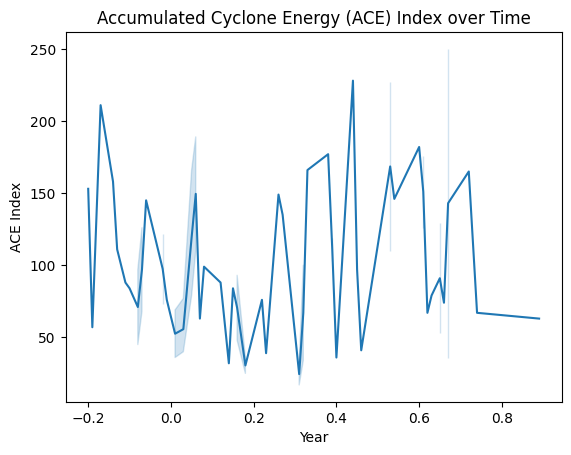

In [87]:
sns.lineplot(x='No Smoothing', y='ACE Index', data=main_df)
plt.title('Accumulated Cyclone Energy (ACE) Index over Time')
plt.xlabel('Year')
plt.ylabel('ACE Index')
plt.show()


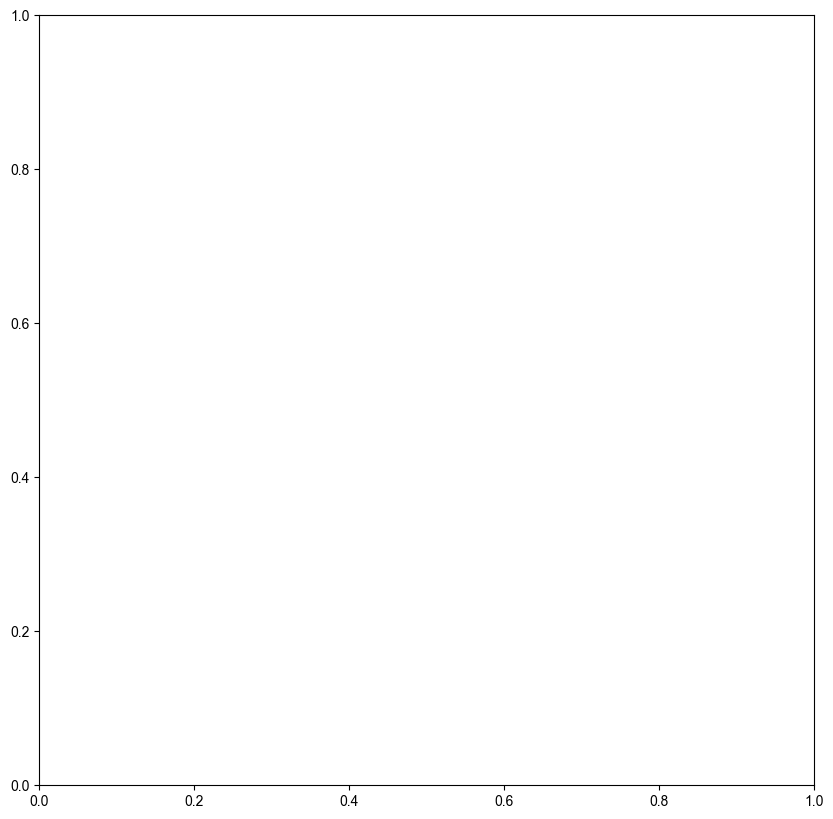

In [88]:
fig, ax = plt.subplots(figsize = (10,10))

sns.set_style("whitegrid")

In [89]:
main_df.to_csv('story-5.csv', index=False)